# <center>House price prediction</center>
### **<center>Mijail Dragowski</center>**
### **<center>2023</center>**




## Introduccion and summary

The objective of this project is to predict the price of houses using a machine learning model. We will use a polynomial regression model and adjust the results using the cross-validation technique to get a more acurate insigth.  It is not our objective to extend ourselves explaining theoretical aspects of the project methodology, so we will provide links with the necessary explanations for a better understanding. In **section 1** (Data and library installation)  we will explain the data used and the libraries implemented in the project, In **section 2** (Data wrangling and data analysis) we carry out all the data processing and analysis necessary to carry out an effective machine learning model, finally, in the **section 3** (machine learning) the machine learning model is developed to predict the price of houses.  




### 1. Data and library installation

The data used in this project comes from the real estate market of several cities in the  Washington state in the USA. The database is composed of the price of the houses and all those characteristics that make it up and affect its price such as number of bedrooms, number of badrooms, square feet of the lot, etc.


 **Import necesary librarys**


In [3]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**Load the dataset**

In [4]:
df = pd.read_csv("data.csv")

**View of the first 5 rows of the dataframe to confirm that the dataframe is loaded correctly**

In [5]:
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 2. Data wrangling and data analysis

**Check and count the missing values of each column**

In [6]:
for column in  df.isnull().columns.values.tolist():
    print(column)
    print ( df.isnull()[column].value_counts())
    print("")    

date
False    4600
Name: date, dtype: int64

price
False    4600
Name: price, dtype: int64

bedrooms
False    4600
Name: bedrooms, dtype: int64

bathrooms
False    4600
Name: bathrooms, dtype: int64

sqft_living
False    4600
Name: sqft_living, dtype: int64

sqft_lot
False    4600
Name: sqft_lot, dtype: int64

floors
False    4600
Name: floors, dtype: int64

waterfront
False    4600
Name: waterfront, dtype: int64

view
False    4600
Name: view, dtype: int64

condition
False    4600
Name: condition, dtype: int64

sqft_above
False    4600
Name: sqft_above, dtype: int64

sqft_basement
False    4600
Name: sqft_basement, dtype: int64

yr_built
False    4600
Name: yr_built, dtype: int64

yr_renovated
False    4600
Name: yr_renovated, dtype: int64

street
False    4600
Name: street, dtype: int64

city
False    4600
Name: city, dtype: int64

statezip
False    4600
Name: statezip, dtype: int64

country
False    4600
Name: country, dtype: int64



**Check Descriptive statistics**

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Check for duplicated values in the dataframe**


In [8]:
df.duplicated().sum()

0

**Check the value count of the column price**


In [9]:
df['price'].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

**Check the value count of the column bathrooms**


In [10]:
df['bathrooms'].value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

**Check the value count of the column floors**


In [11]:
df['floors'].value_counts()

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

**Check the value count of the column bedrooms**


In [12]:
df["bedrooms"].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

 **Exchange the values 0 of the variables price and bathrooms by their respective averages**


In [13]:
avg_price = df["price"].astype("float").mean(axis=0)
df.loc[df["price"]== 0.0  , "price"]= avg_price

avg_bathrooms = df["bathrooms"].astype("float").mean(axis=0)
df.loc[df["bathrooms"]== 0.00  , "bathrooms"]= avg_bathrooms

**Change the type of variable for a more accurate analysis**


In [14]:
df[["floors","bathrooms"]] = df[["floors","bathrooms"]].astype("int")


**Build a heatmap to study the linear correlation between the variables**

Here we will see that although there is a linear correlation between the variables and, as we will see later, this is statistically significant, we will see that multicollinearity is low (which is good) and linearity is also low, so develop a linear regression model is not ideal
 
_For more information about pearson correlation : (https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)  
_For more information about multicollinearity: (https://es.wikipedia.org/wiki/Multicolinealidad)

<ipython-input-15-0f0949341017>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr(method="pearson")


<AxesSubplot:>

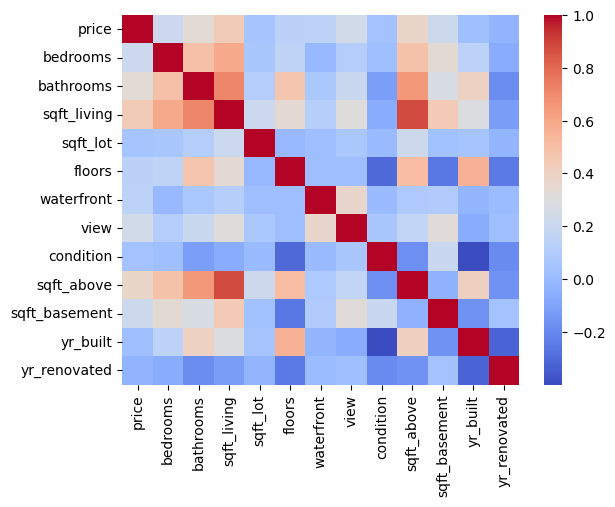

In [15]:
correlation=df.corr(method="pearson")
sns.heatmap(correlation, cmap="coolwarm")

**Check the correlation and its statistical significance between price and every variable** 


In [16]:

pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print("The Pearson Correlation Coefficient for bedrooms is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient for bathrooms is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient for sqft_living is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['sqft_lot'], df['price'])
print("The Pearson Correlation Coefficient for sqft_lot is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['floors'], df['price'])
print("The Pearson Correlation Coefficient for floors is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['waterfront'], df['price'])
print("The Pearson Correlation Coefficient for bathrooms is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['view'], df['price'])
print("The Pearson Correlation Coefficient for view is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['condition'], df['price'])
print("The Pearson Correlation Coefficient for condition is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['sqft_above'], df['price'])
print("The Pearson Correlation Coefficient for sqft_above is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['sqft_basement'], df['price'])
print("The Pearson Correlation Coefficient for sqft_basement is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['yr_built'], df['price'])
print("The Pearson Correlation Coefficient for yr_built is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['yr_renovated'], df['price'])
print("The Pearson Correlation Coefficient for yr_renovated is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient for bedrooms is 0.2080541147552415  with a P-value of P =  3.698038466495988e-46
The Pearson Correlation Coefficient for bathrooms is 0.32836971745763127  with a P-value of P =  4.3279738151436175e-116
The Pearson Correlation Coefficient for sqft_living is 0.4396993108926561  with a P-value of P =  8.206972341231403e-217
The Pearson Correlation Coefficient for sqft_lot is 0.051181342961666806  with a P-value of P =  0.000515404338854976
The Pearson Correlation Coefficient for floors is 0.13764577062986427  with a P-value of P =  6.741443877828155e-21
The Pearson Correlation Coefficient for bathrooms is 0.14306769138582864  with a P-value of P =  1.8286869638023067e-22
The Pearson Correlation Coefficient for view is 0.2371713024768666  with a P-value of P =  7.761074252725149e-60
The Pearson Correlation Coefficient for condition is 0.038528761797463874  with a P-value of P =  0.008964424218112872
The Pearson Correlation Coefficient for sqft_above is 0

**Multi linear regression to check  the significances of the variables**

_For more information about linar regression: (https://en.wikipedia.org/wiki/Linear_regression)



In [17]:
model= smf.ols("price ~ bedrooms + bathrooms  + sqft_living + sqft_lot + floors + waterfront + view + condition +  sqft_above  +  sqft_basement  +  yr_built  + yr_renovated",df)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     123.4
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          1.97e-248
Time:                        15:21:19   Log-Likelihood:                -66822.
No. Observations:                4600   AIC:                         1.337e+05
Df Residuals:                    4588   BIC:                         1.337e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.477e+06   6.74e+05      6.641      0.000    3.16e+06     5.8e+06
bedrooms      -5.283e+04   1.03e+04     -5.152      0.000   -7.29e+04   -3.27e+04
bathrooms      5.963e+04   1.51e+04      3.939      0.000       3e+04    8.93e+04
sqft_living     165.7263      9.161     18.090      0.000     147.766     183.686
sqft_lot         -0.7187      0.210     -3.416      0.001      -1.131      -0.306
floors         3.502e+04   1.87e+04      1.874      0.061   -1617.475    7.17e+04
waterfront     3.904e+05   9.27e+04      4.214      0.000    2.09e+05    5.72e+05
view           4.902e+04   1.08e+04      4.524      0.000    2.78e+04    7.03e+04
condition      3.603e+04   1.29e+04      2.801      0.005    1.08e+04    6.12e+04
sqft_above       99.4681      9.502     10.468      0.000      80.840     118.097
sqft_basement    66.2582     13.063      5.072      0.000      40.648      91.869
yr_built      -2327.9779    337.428     -6.899      0.000   -2989.498   -1666.458
yr_renovated      6.6691      8.509      0.784      0.433     -10.012      23.351
==============================================================================
Omnibus:                    13009.498   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        656645455.010
Skew:                          36.753   Prob(JB):                         0.00
Kurtosis:                    1852.479   Cond. No.                     1.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.59e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 3. Machine learning

We will use a polynomial regression model and adjust the results using the cross-validation technique to get a more acurate insigth. 

_For more information about polynomial reggresion: (https://en.wikipedia.org/wiki/Polynomial_regression)  
_For more information about cross-validation: (https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada)

**We define the variable to predict (price) and the independent variables that we will use to predict**

In [ ]:
y_data = df['price']
x_data=df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above",
           "sqft_basement","yr_built","yr_renovated"]]

**The sample is divided into 2, one part to train and another to test the model**

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 920
number of training samples: 3680


 **We transform the independent variables to make a polynomial model of 2 degree**


In [27]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above",
           "sqft_basement","yr_built","yr_renovated"]])
x_test_pr = pr.fit_transform(x_test[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above",
           "sqft_basement","yr_built","yr_renovated"]])

**We train the model**


In [28]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

**We make a price prediction based on the trained data**


In [29]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([443611.23606355, 621471.44340003, 424363.22343858, 632762.00980178,
       864709.53779958])

 **Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error to evaluate the model**


In [30]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, yhat)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, yhat))))

MAE: 159713.06427518668
MSE: 59862690171.61866
RMSE: 244668.53122463188


**We perform cross validation of the previus model to have a more accurate result**


In [31]:
Rcross = cross_val_score(poly, x_train_pr , y_train, cv=16 ).mean()
 # We can calculate the average and standard deviation of our estimate:                 
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.42729147825565916 and the standard deviation is 0.0


**We can use negative squared error as a score by setting the parameter  'scoring' metric to average of 'neg_mean_squared_error'**


In [34]:
-1 * cross_val_score(poly,x_train_pr, y_train,cv=16,scoring='neg_mean_squared_error').mean()

291653063232.34326

**Now we can predict with more accuracy** 


In [32]:
yhatCV = cross_val_predict(poly, x_train_pr, y_train ,cv=16)
yhatCV[0:5]

array([370737.25834197, 790547.89586735, 809515.10590547, 385912.69555968,
       640137.27595866])